### Chapter 11 - Bayesian Inference Exercise 4
Suppose that 50 people are given a placebo and 50 are given a new treatments. 30 placebo patients show improvement while 40 treated patients show improvement. Let $\tau = p_2 - p_1$ where $p_2$ is the probability of improving under treatment and $p_1$ is the probability of improving under placebo.

#### (a) Find the MLE of $\tau$. Find the standard error and 90 percent confidence interval using the delta method.

By Fisherian Inference, we know that the distribution of $(p_1, p_2)$ are asymtotically normal.

$$ \begin{bmatrix}
    \hat p_1 \\
    \hat p_2
\end{bmatrix} -  
\begin{bmatrix}
    p_1 \\
    p_2
\end{bmatrix} 
\sim N(\textbf{0} , J_n)
$$

where 

$$ J_n = \begin{bmatrix}
    p_1(1-p_1)/50 & 0 \\
    0 & p_2(1-p_2)/50
\end{bmatrix}
$$

Now, set $\tau = g(p_1, p_2) = p_2 - p_1$. We have 

$$\nabla \tau = [-1, 1]^T$$

Therefore, we can derive the standard error of $\hat \tau$ by delta method:

$se(\hat \tau) = (\nabla \tau^T J_n(p_1, p_2) \nabla \tau)^{1/2} = (p_1(1-p_1)/50 + p_2(1-p_2)/50)^{1/2}$

The 95% confidence interval for $\hat \tau$ is:

$\hat \tau \pm z_{0.95} \hat se(\hat \tau)$

where $\hat \tau = \hat p_1 - \hat p_2$

In [1]:
n <- 50
x1 <- 30
x2 <- 40

In [3]:
p1.hat <- x1/n
p2.hat <- x2/n
tau.se <- ((p1.hat*(1-p1.hat)/50) + (p2.hat*(1-p2.hat)/50))^0.5

In [5]:
print(paste0("The estimated standard error of tau  = ", round(tau.se, 3)))

[1] "The estimated standard error of tau  = 0.089"


In [6]:
tau.hat <- p2.hat - p1.hat
tau.low <- tau.hat - qnorm(0.95) * tau.se
tau.high <- tau.hat + qnorm(0.95) * tau.se

In [7]:
print(paste0("The 90% confidence interval of tau  = ", round(tau.low, 3), ", ", round(tau.high, 3)))

[1] "The 90% confidence interval of tau  = 0.053, 0.347"


#### (b) Find the standard error and 90 percent confidence interval using parametric bootstrap.

The procedures of parametric bootstrap is as follows:
1. Estimate $p_1, p_2$ by MLE from observed data $x_1, x_2$, denoted as $\hat p_1, \hat p_2$ (Need not be MLE)
2. Resample $X_1^b, X_2^b$ from $Bin(50, \hat p_1), Bin(50, \hat p_2)$
3. Estimate $p_1, p_2$ from $X_1^b, X_2^b$ by MLE, denoted as $\hat p_1^b, \hat p_2^b$
4. Get $\hat \tau^b = \hat p_1^b - \hat p_2^b$
5. Repeat step 2-4 $B$ times so that we have $\{\hat \tau^b\}_{b=1}^{B}$

The standard error of $\hat \tau$ is the sample standard deviation of  $\{\hat \tau^b\}_{b=1}^{B}$

In [13]:
B <- 20000
retau <- numeric(B)
for (i in 1:B) {
    p1.re <- rbinom(1, size = 50, prob = p1.hat) / 50
    p2.re <- rbinom(1, size = 50, prob = p2.hat) / 50
    retau[i] <- p2.re - p1.re
}

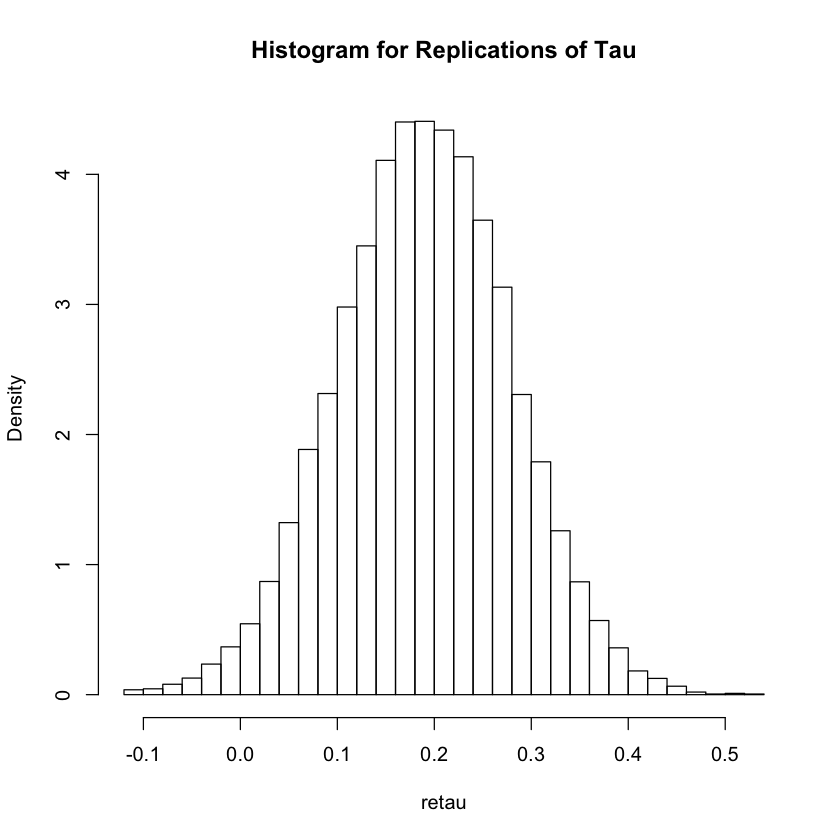

In [14]:
hist(retau, breaks = 40, main = "Histogram for Replications of Tau", freq = FALSE)

In [15]:
tau.boot.se <- sqrt(var(retau))
print(paste0("The standard error of tau = ", round(tau.boot.se, 3)))

[1] "The standard error of tau = 0.089"


* Note that the estimated standard error by parametric bootstrap is so closed to the one calculated by delta method.

As the distribution of bootstrap replications resemble normal distribution, it is safe for us to use normal-based confidence interval

In [16]:
tau.low <- tau.hat - qnorm(0.95) * tau.boot.se
tau.high <- tau.hat + qnorm(0.95) * tau.boot.se
print(paste0("The 90% confidence interval of tau = (", round(tau.low, 3), ", ", round(tau.high,3),")"))

[1] "The 90% confidence interval of tau = (0.054, 0.346)"


* Note that the estimated confidence interval by parametric bootstrap is so also closed to the one calculated by delta method.

#### (c) Use the prior $f(p_1, p_2) = 1$. Use simulation to find the posterior mean and posterior 90 percent interval for $\tau$.

It can be shown that the posterior density of $p_1, p_2$ are independent and they both follows Beta distribution.

Given $X_1 \sim Bin(50, p_1), X_2 \sim Bin(50, p_2)$:

$ g(p_1, p_2| x_1, x_2) \propto f(p_1, p_2) f(x_1|p_1) f(x_2|p_2)$

$ = p_1^{(x_1+1)-1}(1-p_1)^{(51-x_1)-1}p_2^{(x_2+1)-1}(1-p_2)^{(51-x_2)-1}$

$ = f(p_1|x_1) f(p_2|x_2)$

Therefore:

$$ P_1|X_1 \sim Beta(X_1+1, 51 - X_1)$$

$$ P_2|X_2 \sim Beta(X_2+1, 51 - X_2)$$

We can simulate the posterior density of $\tau$ by sampling from $ P_1|X_1, P_2|X_2$

In [32]:
sim.tau <- numeric(B)
for (i in 1:B) {
    sim.p1 <- rbeta(1, x1+1, 51-x1)
    sim.p2 <- rbeta(1, x2+1, 51-x2)
    sim.tau[i] <- sim.p2 - sim.p1
}

In [18]:
tau.post.mean <- mean(sim.tau)
print(paste0("Posterior mean of tau = ", round(tau.post.mean, 3)))

[1] "Posterior mean of tau = 0.192"


In [19]:
tau.post.low <- quantile(sim.tau, 0.05)
tau.post.high <- quantile(sim.tau, 0.95)
print(paste0("Posterior Interval of tau = (", round(tau.post.low, 3), ", ", round(tau.post.high,3), ")"))

[1] "Posterior Interval of tau = (0.046, 0.336)"


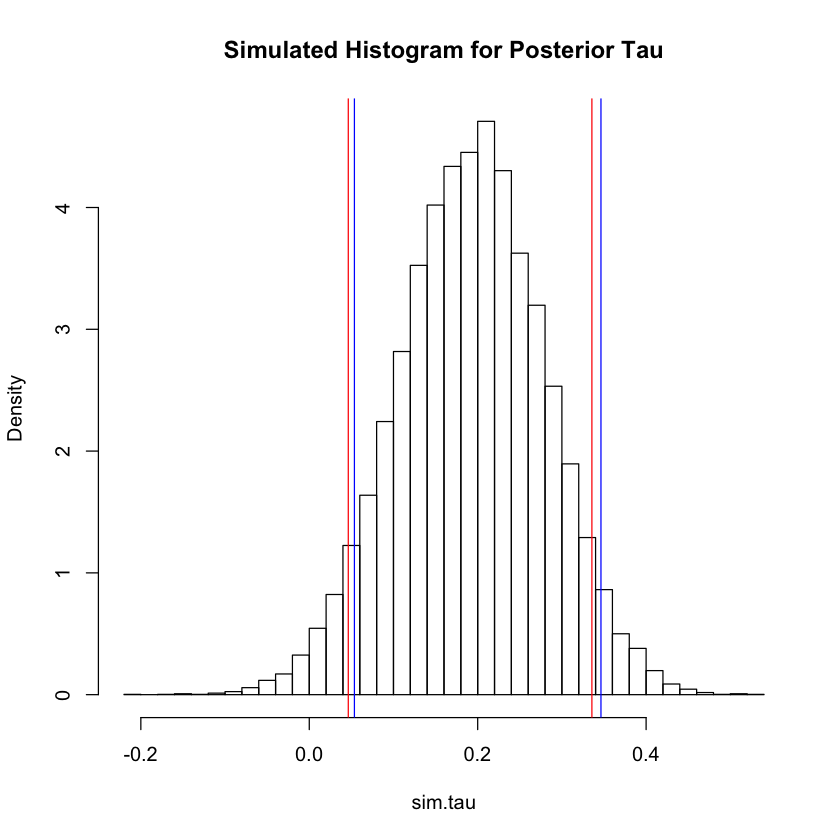

In [34]:
hist(sim.tau, breaks = 50, main = "Simulated Histogram for Posterior Tau", freq = FALSE)
abline(v = c(tau.post.low, tau.post.high), col = "red")
abline(v = c(tau.low, tau.high), col = "blue")

* blue = MLE confidence interval; red = posterior interval
* The two interval are closed
* Similar to MLE result, the distribution centers at 0.2
* In contrary to MLE result, the posterior distribution has a heavier left tail.

#### (d) Let <br><br> $$ \psi = ln((\frac{p_1}{1-p_1}) (\frac{p_2}{1-p_2})^{-1}) $$ <br><br>be the log-odds ratio. Note that $\psi = 0 $ if $p_1 = p_2$. Find the MLE of $\psi$. Use the delta method to find a 90 percent confidence interval for $\psi$.

Similarly, we can find the standard error and confidence interval for $\psi$ by delta method.

$$\psi(p_1, p_2) = ln((\frac{p_1}{1-p_1}) (\frac{p_2}{1-p_2})^{-1}) $$

$$ \nabla \psi = [\frac{1}{p_1(1-p_1)}, \frac{-1}{p_2(1-p_2)}]^T$$

The estimated standard error is

$$\hat se(\hat \psi) = (\nabla \psi^T J_n \nabla \psi)^{1/2} = (\frac{1}{50 \hat p_1(1-\hat p_1)} + \frac{1}{50 \hat p_2(1-\hat p_2)})^{1/2}$$

The 90% confidence interval is 

$$\hat \psi \pm z_{0.95} \hat se(\hat \psi) $$

In [21]:
psi.se <- sqrt((1/(50*p1.hat*(1-p1.hat))) + (1/(50*p2.hat*(1-p2.hat))))
print(paste0("The estimated standard error of psi = ", round(psi.se, 3)))

[1] "The estimated standard error of psi = 0.456"


In [22]:
a <- p1.hat / (1-p1.hat) 
b <- p2.hat / (1-p2.hat)
psi.hat <- log(a/b)

In [24]:
psi.low <- psi.hat - qnorm(0.95) * psi.se
psi.high <- psi.hat + qnorm(0.95) * psi.se
print(paste0("The confidence interval of psi = (", round(psi.low, 3), ", ", round(psi.high, 3), ")"))

[1] "The confidence interval of psi = (-1.732, -0.23)"


#### (e) Use simulation to find the posterior mean and posterior 90 percent interval for $\psi$.

In [35]:
sim.psi <- numeric(B)
for (i in 1:B) {
    sim.p1 <- rbeta(1, x1+1, 51-x1)
    sim.p2 <- rbeta(1, x2+1, 51-x2)
    a <- sim.p1 / (1-sim.p1) 
    b <- sim.p1 / (1-sim.p2)
    sim.psi[i] <- log(a/b)
}

In [27]:
psi.post.mean <- mean(sim.psi)
print(paste0("Posterior mean of psi = ", round(psi.post.mean, 3)))

[1] "Posterior mean of psi = -0.673"


In [28]:
psi.post.low <- quantile(sim.psi, 0.05)
psi.post.high <- quantile(sim.psi, 0.95)
print(paste0("Posterior Interval of psi = (", round(psi.post.low, 3), ", ", round(psi.post.high,3), ")"))

[1] "Posterior Interval of psi = (-1.227, -0.159)"


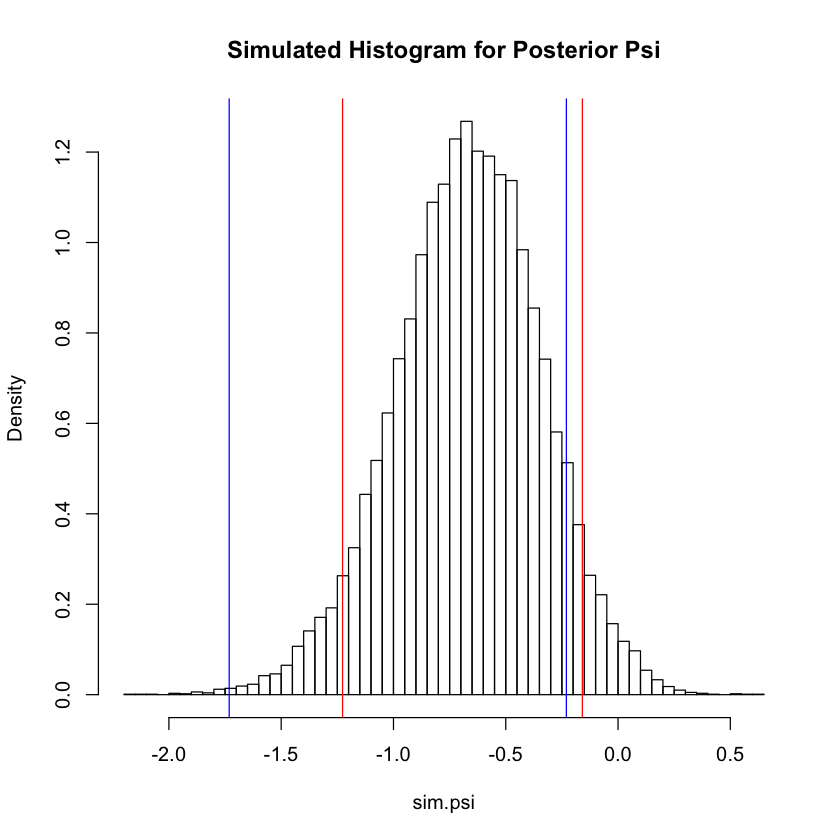

In [36]:
hist(sim.psi, breaks = 50, main = "Simulated Histogram for Posterior Psi", freq = FALSE)
abline(v = c(psi.post.low, psi.post.high), col = "red")
abline(v = c(psi.low, psi.high), col = "blue")

* The posterior interval is quite different from the one by MLE
* The posterior interval is narrower so it is more informative
* The interval by MLE does poorly because the distribution does not resemble normal (though it will be asymtotically normal). It is negatively skewed.